In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,228708,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AL,NaN,NaN,NaN,0,NaN,NaN
114317,228710,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,E,NaN,NaN,NaN,1,NaN,NaN
114318,228711,1,NaN,NaN,C,NaN,10.069277,NaN,NaN,0.323324,...,NaN,NaN,0.156764,Q,NaN,NaN,2.417606,2,NaN,NaN
114319,228712,1,NaN,NaN,C,NaN,10.106144,NaN,NaN,0.309226,...,NaN,NaN,0.490658,BW,NaN,NaN,3.526650,0,NaN,NaN


In [4]:
data.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,9.135798e-01,5.316428e+00,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,...,1.786965e+00,5.647712e+00,1.963315,2.053777e-02,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,114189.000000,1.000000,1.469550e+00,7.023803e+00,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,...,2.436195e+00,6.749117e+00,2.739239,1.398639e-01,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,171206.000000,1.000000,2.136128e+00,9.465497e+00,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,...,3.379175e+00,7.911392e+00,4.075361,8.718333e-01,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


In [5]:
data.dtypes

ID          int64
target      int64
v1        float64
v2        float64
v3         object
           ...   
v127      float64
v128      float64
v129        int64
v130      float64
v131      float64
Length: 133, dtype: object

In [6]:
def missed_values(data):
    length = len(data)
    for i in data.columns:
        print(f'{i:10} {100 - data[i].isnull().value_counts()[0] / length * 100 :.3f}% {(length - data[i].isnull().value_counts()[0]):10}  {data[i].dtype} ')
missed_values(data)

ID         0.000%          0  int64 
target     0.000%          0  int64 
v1         43.590%      49832  float64 
v2         43.558%      49796  float64 
v3         3.024%       3457  object 
v4         43.558%      49796  float64 
v5         42.533%      48624  float64 
v6         43.590%      49832  float64 
v7         43.590%      49832  float64 
v8         42.528%      48619  float64 
v9         43.606%      49851  float64 
v10        0.073%         84  float64 
v11        43.593%      49836  float64 
v12        0.075%         86  float64 
v13        43.590%      49832  float64 
v14        0.003%          4  float64 
v15        43.593%      49836  float64 
v16        43.645%      49895  float64 
v17        43.558%      49796  float64 
v18        43.590%      49832  float64 
v19        43.599%      49843  float64 
v20        43.597%      49840  float64 
v21        0.534%        611  float64 
v22        0.437%        500  object 
v23        44.327%      50675  float64 
v24        0.0

Большинство колонок имеют более 43% процентов пропущенных значений, слишком много , чтобы заполнять их какими-то средними и тд значениями(учитывая то, что организатор не дал никаких пояснений по поводу их смысла), удалим их

In [7]:
def delete_missed_columns(data, threshold):
    length = len(data)
    for i in data.columns:
        if 1 - data[i].isnull().value_counts()[0] / length > threshold:
            del data[i]
delete_missed_columns(data, 0.1)

In [8]:
data

,ID,target,v3,v10,v12,v14,v21,v22,v24,v31,...,v74,v75,v79,v91,v107,v110,v112,v114,v125,v129
0,3,1,C,0.503281,6.085711,11.636387,7.730923,XDX,C,A,...,B,D,E,A,E,B,O,15.634907,AU,0
1,4,1,C,1.312910,6.507647,11.636386,6.763110,GUV,C,A,...,B,D,D,B,B,A,U,10.308044,AF,0
2,5,1,C,0.765864,6.384670,9.603542,5.245035,FQ,E,A,...,B,B,E,G,C,B,S,11.205561,AE,2
3,6,1,C,6.542669,9.646653,14.094723,7.517125,ACUE,D,B,...,B,D,B,B,B,B,J,13.777666,CJ,1
4,8,1,C,1.050328,6.320087,10.991098,6.414567,HIT,E,A,...,B,D,C,G,C,A,T,14.097099,Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,228708,1,C,1.444201,6.368061,11.865255,7.088172,ADQC,E,A,...,B,B,C,A,E,A,U,15.392866,AL,0
114317,228710,1,C,6.236324,9.443324,14.924483,8.455263,XRT,D,B,...,B,D,B,G,C,B,J,11.248736,E,1
114318,228711,1,C,2.078775,6.698925,12.269012,6.570625,AGTG,A,B,...,B,B,B,G,C,B,R,8.893134,Q,2
114319,228712,1,C,1.291029,6.692204,12.573678,7.730751,SGB,D,A,...,B,D,E,A,E,B,A,12.381113,BW,0


In [9]:
missed_values(data)

ID         0.000%          0  int64 
target     0.000%          0  int64 
v3         3.024%       3457  object 
v10        0.073%         84  float64 
v12        0.075%         86  float64 
v14        0.003%          4  float64 
v21        0.534%        611  float64 
v22        0.437%        500  object 
v24        0.000%          0  object 
v31        3.024%       3457  object 
v34        0.097%        111  float64 
v38        0.000%          0  int64 
v40        0.097%        111  float64 
v47        0.000%          0  object 
v50        0.075%         86  float64 
v52        0.003%          3  object 
v56        6.020%       6882  object 
v62        0.000%          0  int64 
v66        0.000%          0  object 
v71        0.000%          0  object 
v72        0.000%          0  int64 
v74        0.000%          0  object 
v75        0.000%          0  object 
v79        0.000%          0  object 
v91        0.003%          3  object 
v107       0.003%          3  object 
v110      

In [10]:
data.describe()

,ID,target,v10,v12,v14,v21,v34,v38,v40,v50,v62,v72,v114,v129
count,114321.000000,114321.000000,1.142370e+05,1.142350e+05,1.143170e+05,113710.000000,1.142100e+05,114321.000000,1.142100e+05,1.142350e+05,114321.000000,114321.000000,1.142910e+05,114321.000000
mean,114228.928228,0.761199,1.883046e+00,6.881304e+00,1.209428e+01,7.029740,6.406236e+00,0.090928,1.046593e+01,1.504265e+00,1.030694,1.431767,1.357445e+01,0.310144
std,65934.487362,0.426353,1.393979e+00,9.244945e-01,1.443947e+00,1.072271,2.025179e+00,0.583478,3.169183e+00,1.168329e+00,0.696244,0.922267,2.613221e+00,0.693262
min,3.000000,0.000000,-9.875317e-07,5.143224e-07,-9.738831e-07,0.106181,-6.707670e-07,0.000000,1.238996e-07,-9.091393e-07,0.000000,0.000000,-9.335327e-10,0.000000
25%,57280.000000,1.000000,1.050328e+00,6.322471e+00,1.125602e+01,6.415535,5.054165e+00,0.000000,8.408220e+00,6.587918e-01,1.000000,1.000000,1.199531e+01,0.000000
50%,114189.000000,1.000000,1.312910e+00,6.612969e+00,1.196783e+01,7.045416,6.537069e+00,0.000000,1.033427e+01,1.211944e+00,1.000000,1.000000,1.403998e+01,0.000000
75%,171206.000000,1.000000,2.100657e+00,7.019983e+00,1.271577e+01,7.670577,7.702703e+00,0.000000,1.276518e+01,2.007189e+00,1.000000,2.000000,1.537267e+01,0.000000
max,228713.000000,1.000000,1.853392e+01,1.871055e+01,2.000000e+01,19.296052,2.000000e+01,12.000000,2.000000e+01,2.000000e+01,7.000000,12.000000,2.000000e+01,11.000000


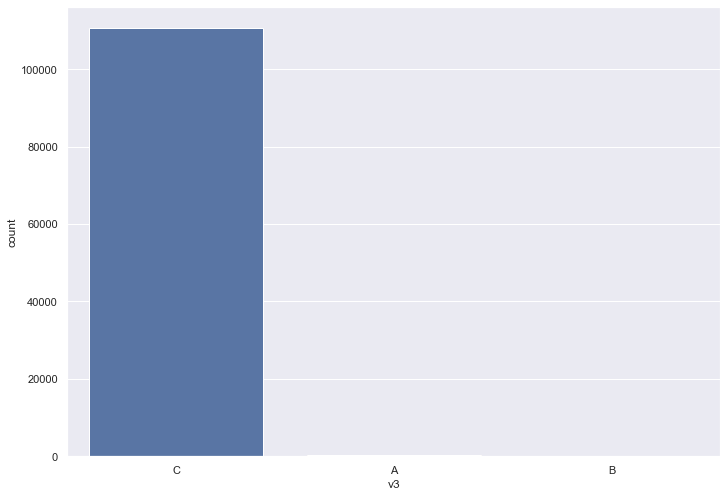

In [11]:
sns.countplot(x = 'v3', data = data)

In [12]:
data['v3'] = data['v3'].fillna('C')

In [13]:
data['v22'].value_counts()

AGDF    2386
YGJ     2119
QKI      668
PWR      649
HZE      423
        ... 
ABUL       1
WKS        1
UDT        1
QAE        1
QVU        1
Name: v22, Length: 18210, dtype: int64

С этой фичей разберемся чутка позже

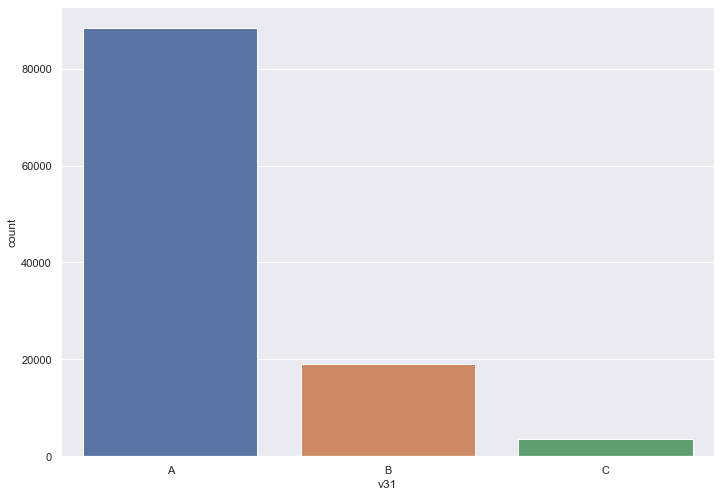

In [14]:
sns.countplot(x = 'v31', data = data)

In [15]:
data['v31'] = data['v31'].fillna('A')

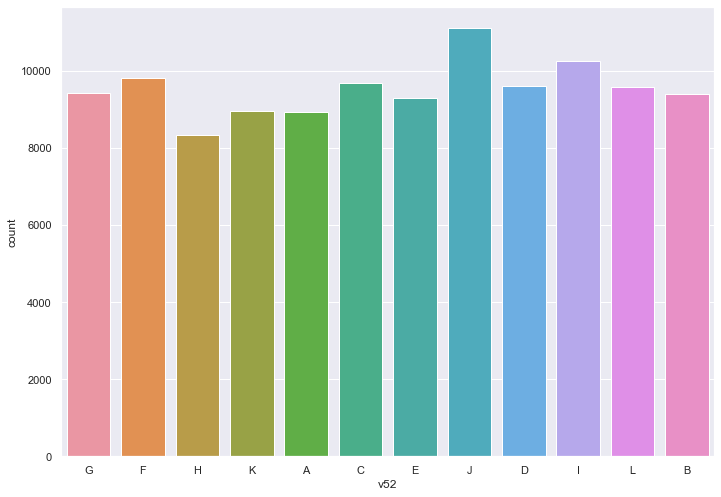

In [16]:
sns.countplot(x = 'v52', data = data)

In [17]:
data['v52'] = data['v52'].fillna('J')

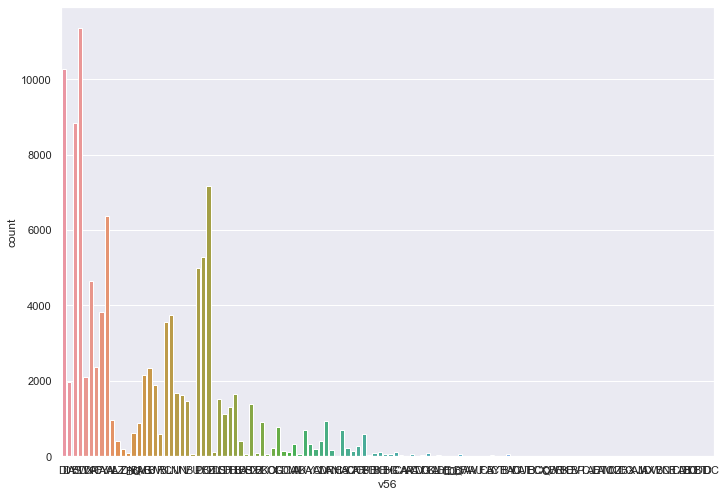

In [18]:
sns.countplot(x = 'v56', data = data)

In [19]:
data['v56'].value_counts()

BW    11351
DI    10256
AS     8832
BZ     7174
AW     6369
      ...  
AX        1
CZ        1
AP        1
X         1
CK        1
Name: v56, Length: 122, dtype: int64

С ней тоже пока разберемся чутка позже

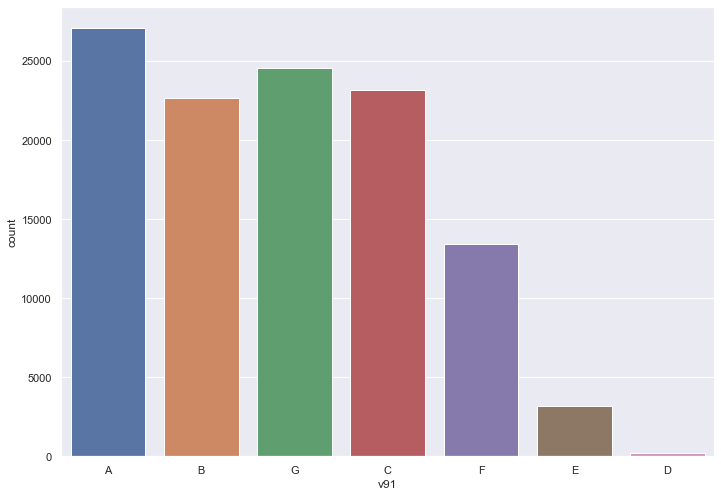

In [20]:
sns.countplot(x = 'v91', data = data)

In [21]:
data['v91'] = data['v91'].fillna('B')

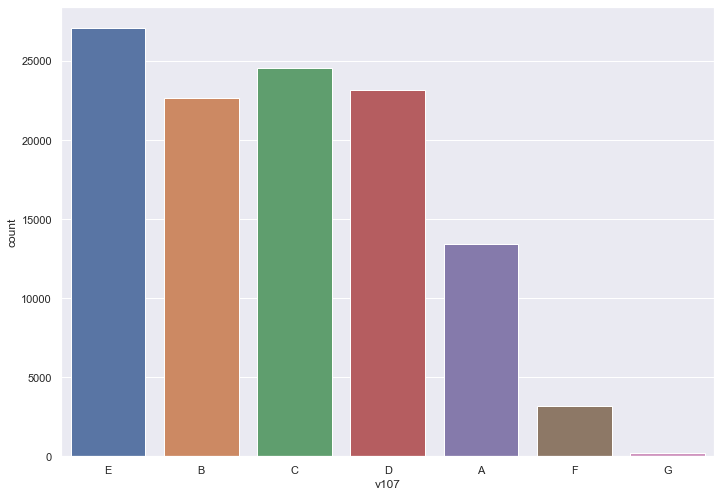

In [22]:
sns.countplot(x = 'v107', data = data)

In [23]:
data['v107'] = data['v107'].fillna('B')

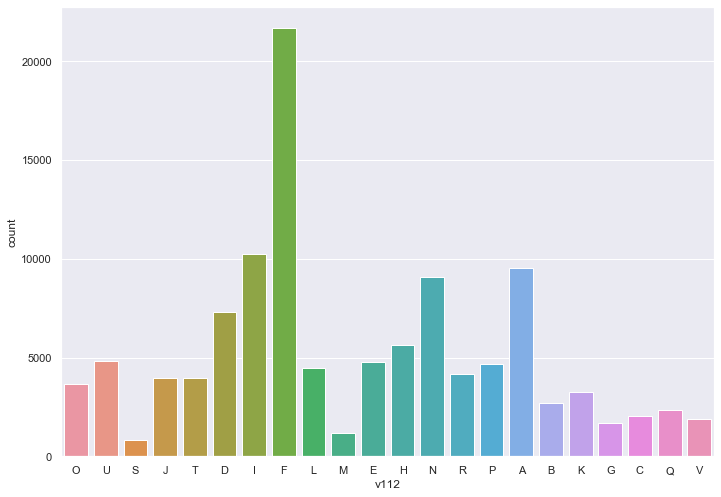

In [24]:
sns.countplot(x = 'v112', data = data)

In [25]:
data['v112'] = data['v112'].fillna('F')

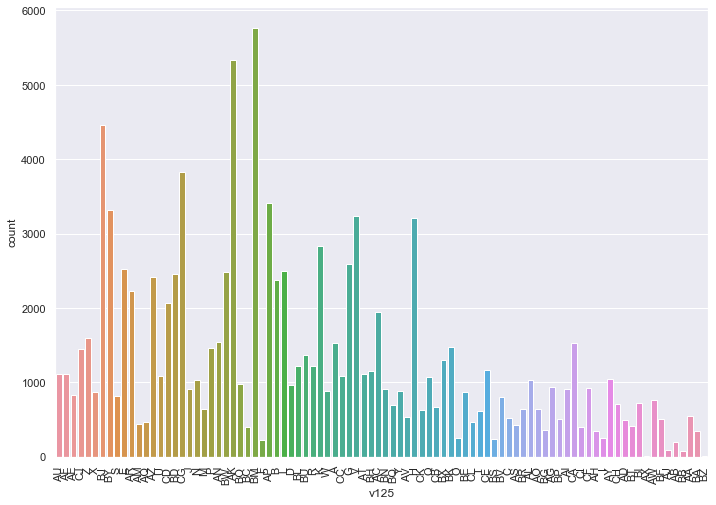

In [26]:
chart = sns.countplot(x = 'v125', data = data)
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [27]:
data['v125'].value_counts()

BM    5759
AK    5337
BJ    4465
CG    3826
AP    3410
      ... 
AB     189
AJ      82
BB      68
AX      13
BZ       3
Name: v125, Length: 90, dtype: int64

In [28]:
def fillna_mean(data, column):
    data[column] = data[column].fillna(data[column].mean())

In [29]:
fillna_mean(data, 'v10')
fillna_mean(data, 'v12')
fillna_mean(data, 'v14')
fillna_mean(data, 'v21')
fillna_mean(data, 'v34')
fillna_mean(data, 'v40')
fillna_mean(data, 'v50')
fillna_mean(data, 'v114')

В данных числовых колонках пропущено очень мало значений, поэтому разумно было бы их заполнить средним арифметическим

In [30]:
missed_values(data)

ID         0.000%          0  int64 
target     0.000%          0  int64 
v3         0.000%          0  object 
v10        0.000%          0  float64 
v12        0.000%          0  float64 
v14        0.000%          0  float64 
v21        0.000%          0  float64 
v22        0.437%        500  object 
v24        0.000%          0  object 
v31        0.000%          0  object 
v34        0.000%          0  float64 
v38        0.000%          0  int64 
v40        0.000%          0  float64 
v47        0.000%          0  object 
v50        0.000%          0  float64 
v52        0.000%          0  object 
v56        6.020%       6882  object 
v62        0.000%          0  int64 
v66        0.000%          0  object 
v71        0.000%          0  object 
v72        0.000%          0  int64 
v74        0.000%          0  object 
v75        0.000%          0  object 
v79        0.000%          0  object 
v91        0.000%          0  object 
v107       0.000%          0  object 
v110      

Теперь осталось разобраться с 3 категориальными колонками

In [31]:
data['v22'].fillna(0, inplace=True)
data['v56'].fillna(0, inplace=True)
data['v125'].fillna(0, inplace=True)

In [32]:
missed_values(data)

ID         0.000%          0  int64 
target     0.000%          0  int64 
v3         0.000%          0  object 
v10        0.000%          0  float64 
v12        0.000%          0  float64 
v14        0.000%          0  float64 
v21        0.000%          0  float64 
v22        0.000%          0  object 
v24        0.000%          0  object 
v31        0.000%          0  object 
v34        0.000%          0  float64 
v38        0.000%          0  int64 
v40        0.000%          0  float64 
v47        0.000%          0  object 
v50        0.000%          0  float64 
v52        0.000%          0  object 
v56        0.000%          0  object 
v62        0.000%          0  int64 
v66        0.000%          0  object 
v71        0.000%          0  object 
v72        0.000%          0  int64 
v74        0.000%          0  object 
v75        0.000%          0  object 
v79        0.000%          0  object 
v91        0.000%          0  object 
v107       0.000%          0  object 
v110      

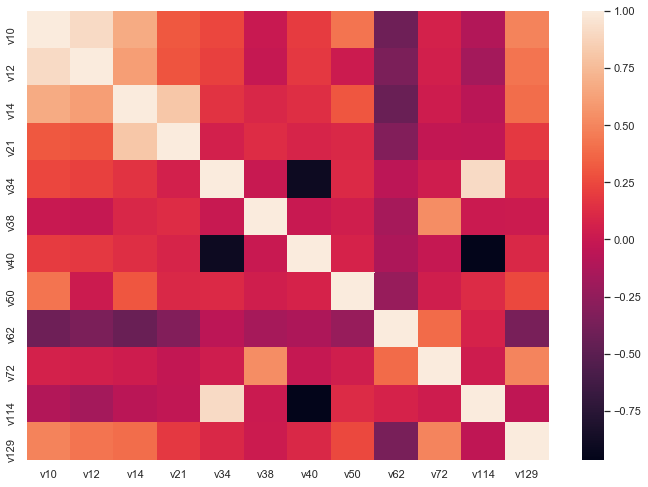

In [33]:
sns.heatmap(data.drop(['target','ID'], axis = 1).corr())

In [34]:
data

,ID,target,v3,v10,v12,v14,v21,v22,v24,v31,...,v74,v75,v79,v91,v107,v110,v112,v114,v125,v129
0,3,1,C,0.503281,6.085711,11.636387,7.730923,XDX,C,A,...,B,D,E,A,E,B,O,15.634907,AU,0
1,4,1,C,1.312910,6.507647,11.636386,6.763110,GUV,C,A,...,B,D,D,B,B,A,U,10.308044,AF,0
2,5,1,C,0.765864,6.384670,9.603542,5.245035,FQ,E,A,...,B,B,E,G,C,B,S,11.205561,AE,2
3,6,1,C,6.542669,9.646653,14.094723,7.517125,ACUE,D,B,...,B,D,B,B,B,B,J,13.777666,CJ,1
4,8,1,C,1.050328,6.320087,10.991098,6.414567,HIT,E,A,...,B,D,C,G,C,A,T,14.097099,Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,228708,1,C,1.444201,6.368061,11.865255,7.088172,ADQC,E,A,...,B,B,C,A,E,A,U,15.392866,AL,0
114317,228710,1,C,6.236324,9.443324,14.924483,8.455263,XRT,D,B,...,B,D,B,G,C,B,J,11.248736,E,1
114318,228711,1,C,2.078775,6.698925,12.269012,6.570625,AGTG,A,B,...,B,B,B,G,C,B,R,8.893134,Q,2
114319,228712,1,C,1.291029,6.692204,12.573678,7.730751,SGB,D,A,...,B,D,E,A,E,B,A,12.381113,BW,0


Обучим первую модель и посмотрим от какого результата нам вообще отталкиваться

In [35]:
from lightgbm import LGBMClassifier

In [36]:
data.dtypes

ID          int64
target      int64
v3         object
v10       float64
v12       float64
v14       float64
v21       float64
v22        object
v24        object
v31        object
v34       float64
v38         int64
v40       float64
v47        object
v50       float64
v52        object
v56        object
v62         int64
v66        object
v71        object
v72         int64
v74        object
v75        object
v79        object
v91        object
v107       object
v110       object
v112       object
v114      float64
v125       object
v129        int64
dtype: object

In [37]:
data['v38'].value_counts()

0     109724
1       2143
2       1198
3        534
4        256
5        153
7         85
6         69
8         61
10        47
9         38
12        13
Name: v38, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
def preprocess_categorical(data, column):
    le = LabelEncoder()
    le.fit(data[column].tolist())
    data[column] = le.transform(data[column].tolist())

In [39]:
for i in ['v3','v22','v24','v31','v38','v47','v52','v56','v66','v71','v74','v75','v79','v91','v107','v110','v112','v114','v125','v129']:
    preprocess_categorical(data, i)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data.set_index('ID').drop('target', axis = 1),data.set_index('ID')['target'], random_state = 42, test_size = 0.3 )

In [42]:
data = data.set_index('ID')
data

,target,v3,v10,v12,v14,v21,v22,v24,v31,v34,...,v74,v75,v79,v91,v107,v110,v112,v114,v125,v129
ID,,,,,,,,,,,,,,,,,,,,,
3,1,2,0.503281,6.085711,11.636387,7.730923,16671,2,0,7.270147,...,1,3,4,0,4,1,14,91406,22,0
4,1,2,1.312910,6.507647,11.636386,6.763110,7734,2,0,3.615077,...,1,3,3,1,1,0,20,14574,7,0
5,1,2,0.765864,6.384670,9.603542,5.245035,7087,4,0,4.043864,...,1,1,4,6,2,1,18,21134,6,2
6,1,2,6.542669,9.646653,14.094723,7.517125,1511,3,1,8.703550,...,1,3,1,1,1,1,9,52639,65,1
8,1,2,1.050328,6.320087,10.991098,6.414567,8038,4,0,6.083151,...,1,3,2,6,2,0,19,58249,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228708,1,2,1.444201,6.368061,11.865255,7.088172,1973,4,0,7.281489,...,1,1,2,0,4,0,20,86145,13,0
228710,1,2,6.236324,9.443324,14.924483,8.455263,16965,3,1,6.721720,...,1,3,1,6,2,1,9,21533,69,1
228711,1,2,2.078775,6.698925,12.269012,6.570625,3678,0,1,3.029508,...,1,1,1,6,2,1,17,7066,81,2


In [43]:
model = LGBMClassifier()

In [44]:
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [45]:
result= model.predict_proba(x_test)

In [46]:
from sklearn.metrics import log_loss

In [47]:
log_loss(y_test, result)

0.4680884885220921

In [48]:
data.columns

Index(['target', 'v3', 'v10', 'v12', 'v14', 'v21', 'v22', 'v24', 'v31', 'v34',
       'v38', 'v40', 'v47', 'v50', 'v52', 'v56', 'v62', 'v66', 'v71', 'v72',
       'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v114', 'v125',
       'v129'],
      dtype='object')

In [49]:
model.feature_importances_

array([  7, 140, 137, 147, 155, 213, 115,  33, 173,  29, 163,  85, 376,
       100, 165,  29, 198,  30,  56,  19,   9,  73,  32,  53,   8,  96,
       159, 157,  43])

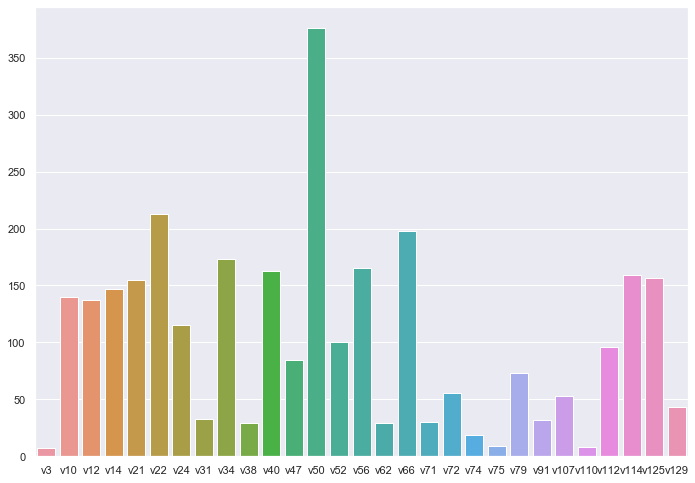

In [50]:
sns.barplot( data.columns[1:], model.feature_importances_)

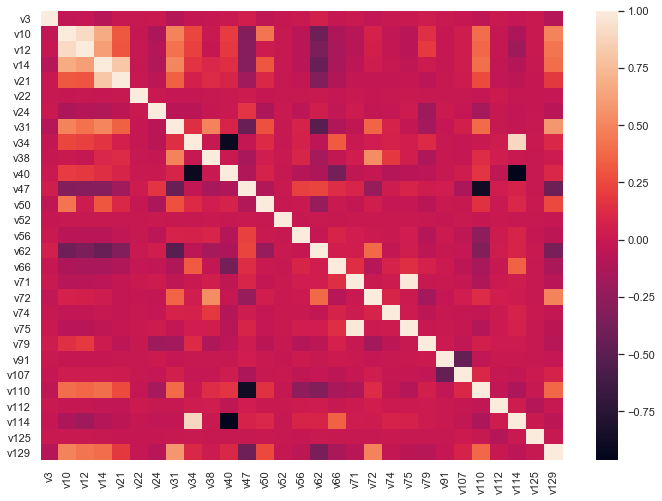

In [51]:
sns.heatmap(data.drop(['target'], axis = 1).corr())

Давайте посмотрим сильно коррелирующие колонки

In [52]:
data.dtypes

target      int64
v3          int64
v10       float64
v12       float64
v14       float64
v21       float64
v22         int64
v24         int64
v31         int64
v34       float64
v38         int64
v40       float64
v47         int64
v50       float64
v52         int64
v56         int64
v62         int64
v66         int64
v71         int64
v72         int64
v74         int64
v75         int64
v79         int64
v91         int64
v107        int64
v110        int64
v112        int64
v114        int64
v125        int64
v129        int64
dtype: object

In [53]:
import matplotlib.pyplot as plt
def corr_columns(data,col1, col2):
    fig, ax = plt.subplots(nrows = 2)
    sns.scatterplot(data[col1],data[col2], ax = ax[0])
    ax[1].plot(data.reset_index()['ID'][:50], data[col1][:50])
    ax[1].plot(data.reset_index()['ID'][:50], data[col2][:50])

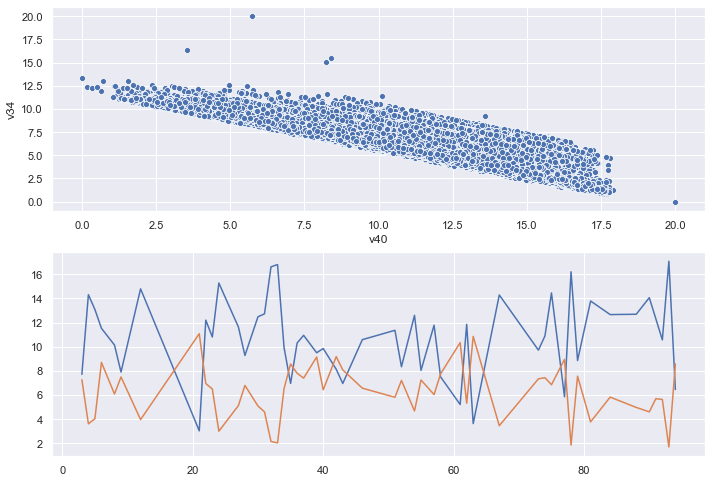

In [54]:
corr_columns(data, 'v40','v34')

Большая корреляция, можно будет попробовать поубирать одну из этиъ колонок

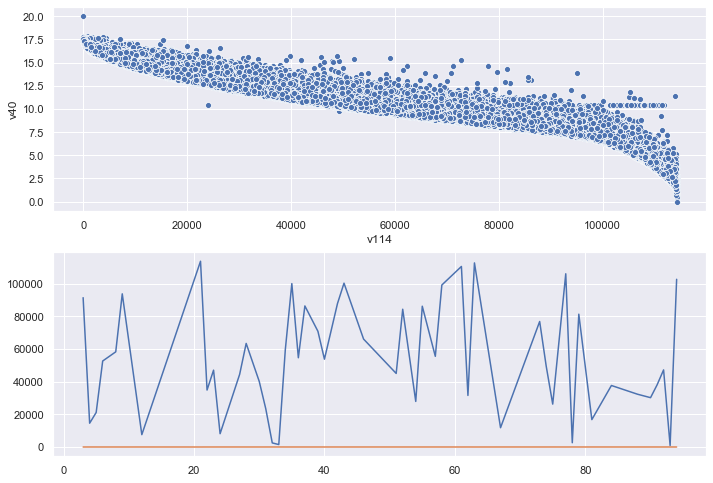

In [55]:
corr_columns(data,'v114','v40')

Большая корреляция, можно будет попробовать поубирать одну из этиъ колонок

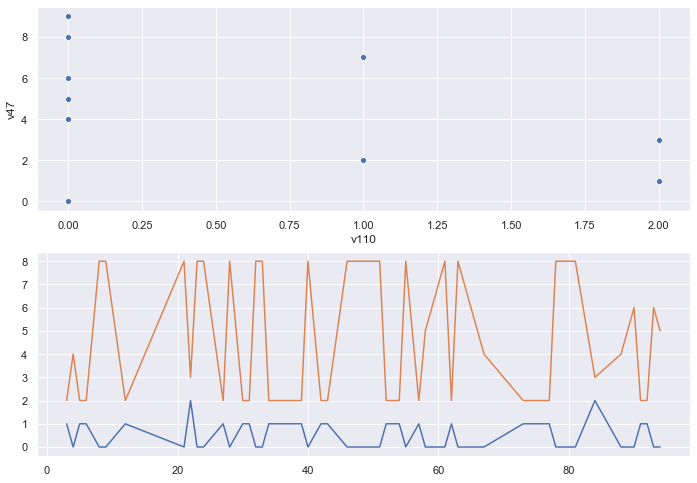

In [56]:
corr_columns(data,'v110','v47')

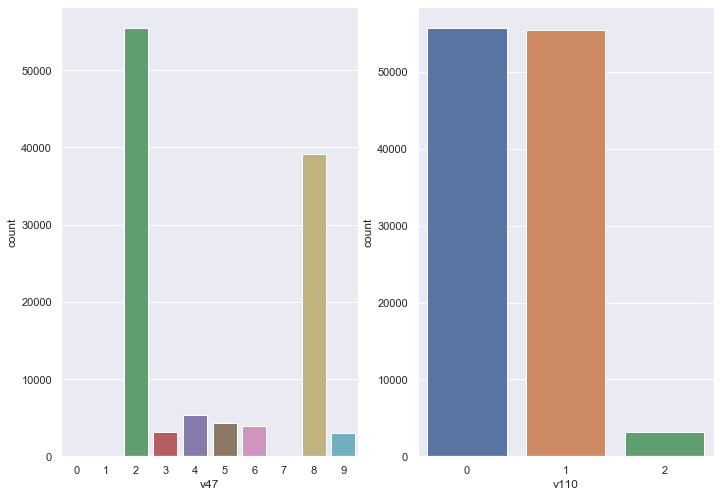

In [57]:
fig, ax = plt.subplots(ncols = 2)
sns.countplot(data['v47'], ax = ax[0])
sns.countplot(data['v110'], ax = ax[1])

Мало в чем пересекаются, поэтому их трогать не будем

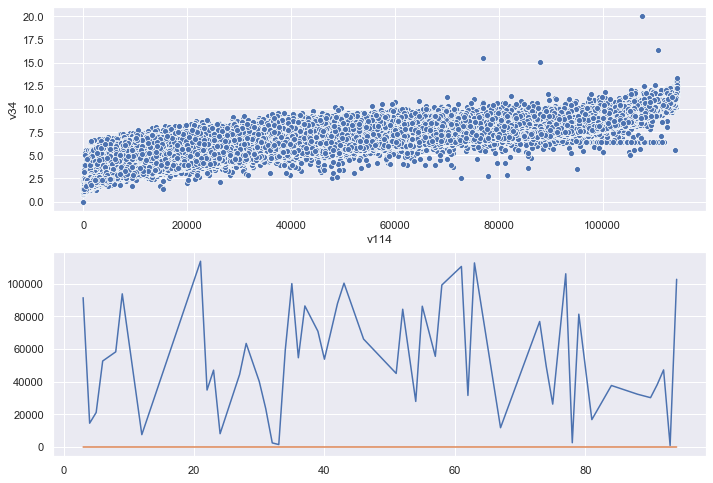

In [58]:
corr_columns(data,'v114','v34')

Большая корреляция, можно будет попробовать поубирать одну из этиъ колонок

In [59]:
data['v114'].value_counts()

49311    30
29057     2
53962     2
21822     2
72667     2
         ..
56014     1
53967     1
10960     1
8913      1
0         1
Name: v114, Length: 114268, dtype: int64

In [60]:
data['v34'].value_counts()

6.406236    111
8.730352      2
5.787665      1
8.958782      1
5.674988      1
           ... 
7.035705      1
5.422516      1
6.430462      1
6.378858      1
5.883867      1
Name: v34, Length: 114210, dtype: int64

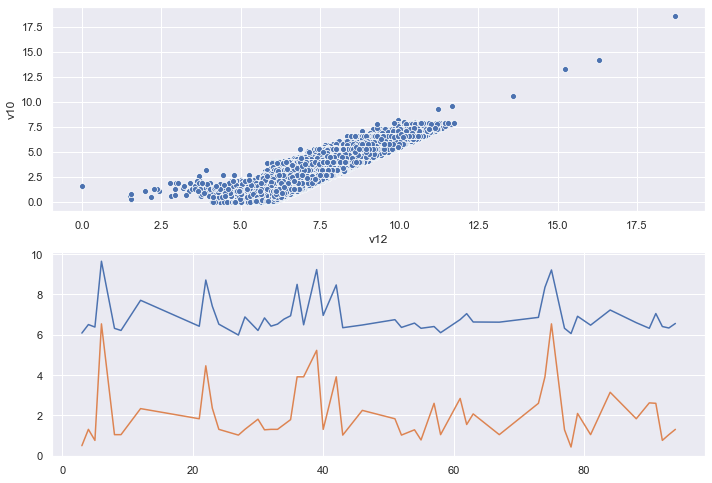

In [61]:
corr_columns(data,'v12','v10')

Большая корреляция, можно будет попробовать поубирать одну из этих колонок

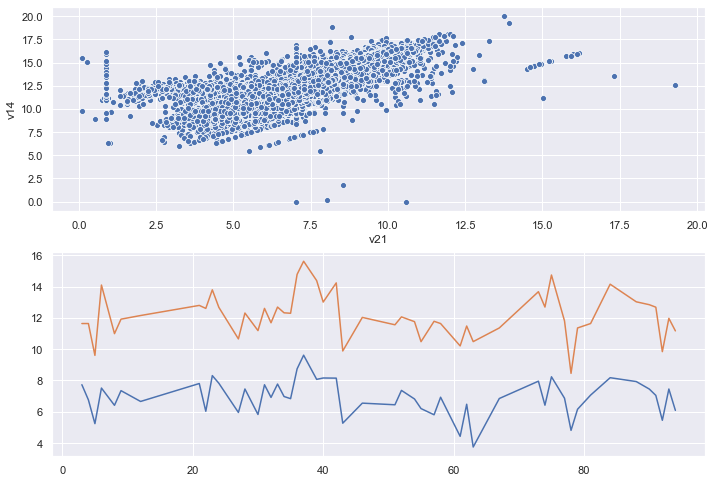

In [62]:
corr_columns(data,'v21','v14')

Большая корреляция, можно будет попробовать поубирать одну из этих колонок

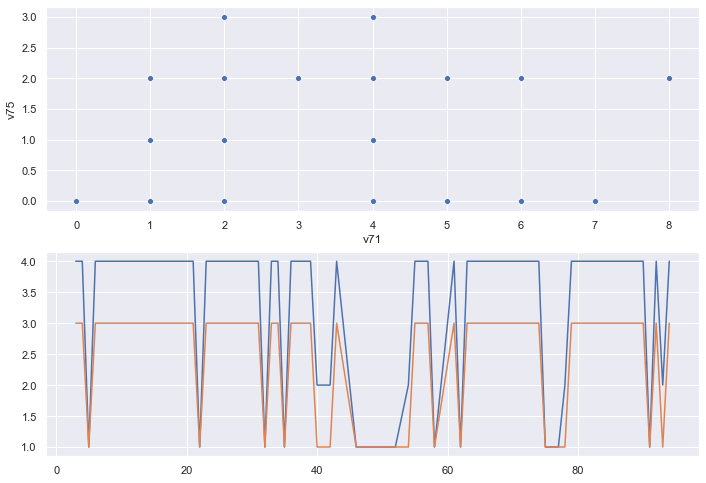

In [63]:
corr_columns(data,'v71','v75')

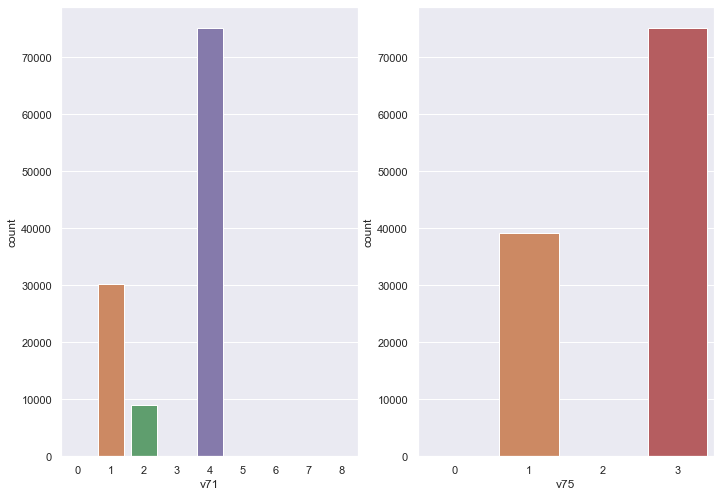

In [64]:
fig, ax = plt.subplots(ncols = 2)
sns.countplot(data['v71'], ax = ax[0])
sns.countplot(data['v75'], ax = ax[1])

Складывается ощущение, что 4 колонку перенесли в 3, а 1 и 2 сложили в 1, тоже попробуем поубирать

In [65]:
data['v71'].value_counts()

4    75094
1    30255
2     8947
6       16
5        5
8        1
7        1
3        1
0        1
Name: v71, dtype: int64

In [66]:
data['v75'].value_counts()

3    75087
1    39192
2       24
0       18
Name: v75, dtype: int64

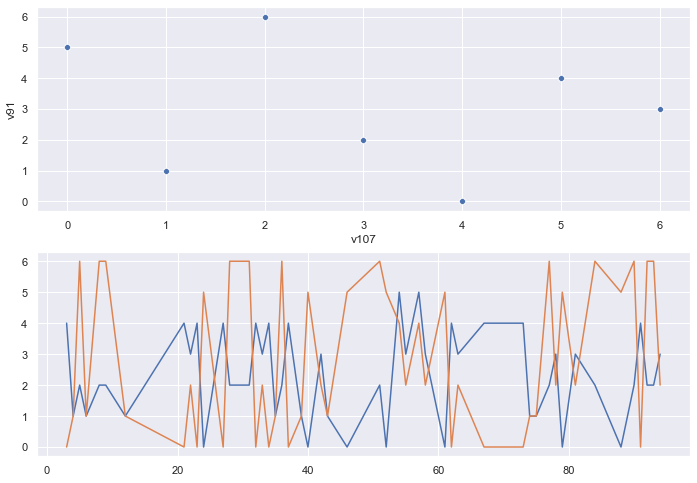

In [67]:
corr_columns(data,'v107','v91')

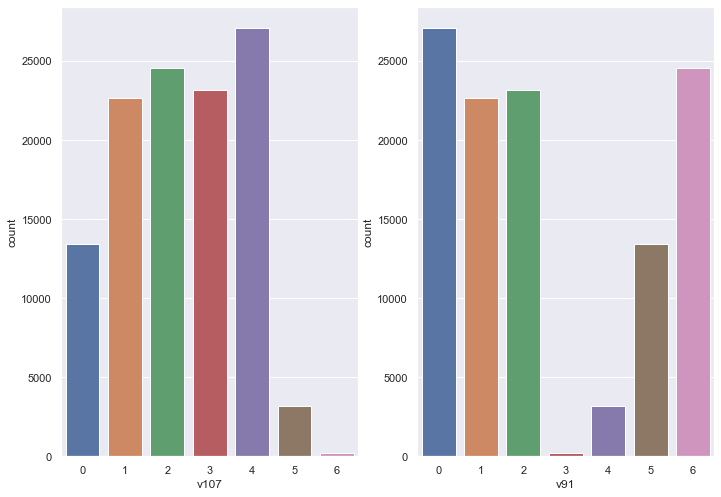

In [68]:
fig, ax = plt.subplots(ncols = 2)
sns.countplot(data['v107'], ax = ax[0])
sns.countplot(data['v91'], ax = ax[1])

Здесь отчетливо видно, что просто перемешаны колонки, одну из этих фич точно имеет смысл убрать

Итого будем играться вот с этими колонками:

40 и 34, 114 и 40, 114 и 34, 12 и 10, 21 и 14, 71 и 75, 107 и 91

### Организуем отдельные функции для более удобной работы с данными

In [69]:
from numpy import *

In [70]:
data1 = pd.read_csv('train.csv').set_index('ID')

In [71]:
def preprocess_data(data):
    delete_missed_columns(data, 0.1)
    
#     data['v3_missed'] = 0
#     data['v3_missed'] = data['v3'].where(data['v3'] == None, 1)
#     data['v3_missed'] = data['v3'].fillna('1')
#     data['v31_missed'] = 0
#     data['v31_missed'] = data['v3'].fillna('1')
#     data['v52_missed'] = 0
#     data['v52_missed'] = data['v3'].fillna('1')
#     data['v91_missed'] = 0
#     data['v91_missed'] = data['v3'].fillna('1')
#     data['v107_missed'] = 0
#     data['v107_missed'] = data['v3'].fillna('1')
#     data['v112_missed'] = 0
#     data['v112_missed'] = data['v3'].fillna('1')
    
    data['v3'] = data['v3'].fillna('C')
    data['v31'] = data['v31'].fillna('A')
    data['v52'] = data['v52'].fillna('J')
    data['v91'] = data['v91'].fillna('B')
    data['v107'] = data['v107'].fillna('B')
    data['v112'] = data['v112'].fillna('F')
    
    
    
    fillna_mean(data, 'v10')
    fillna_mean(data, 'v12')
    fillna_mean(data, 'v14')
    fillna_mean(data, 'v21')
    fillna_mean(data, 'v34')
    fillna_mean(data, 'v40')
    fillna_mean(data, 'v50')
    fillna_mean(data, 'v114')
    
    data['v22'].fillna(0, inplace=True)
    data['v56'].fillna(0, inplace=True)
    data['v125'].fillna(0, inplace=True)
    
    for i in ['v3','v22','v24','v31','v38','v47','v52','v56','v66','v71','v74','v75','v79','v91','v107','v110','v112','v114','v125','v129']:
        preprocess_categorical(data, i)
    
#     data['my1'] = data['v12']+data['v10']+data['v14']+data['v21']
        
#     data['my2'] = data['v12']/data['v10']
#     data['my3'] = data['v14']+data['v21']
#     data['my4'] = data['v12']-data['v22']
#     data['my5'] = data['v114']*data['v40']
    
    data.drop(['v34'], axis = 1, inplace = True)
#     data.drop(['v3','v75','v110','v52','v125','v22'], axis = 1, inplace = True)
#     data.drop(['v14','v21'], axis = 1, inplace = True)

#     floats = []
#     for i in range(len(data.dtypes)):
#         if data.dtypes[i] == dtype('float64'):
#             floats.append(i)
            
#     print(floats)        
#     count = 0
#     for i in range(len(floats)):
#         for j in range(i + 1,len(floats)):
#             data[f'my{count}'] = data[f'v{floats[i] + 1}'] / data[f'v{floats[j] + 1}']
#             count += 1


In [72]:
def get_score(data1):
    data = data1.copy()
    preprocess_data(data)
    x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis = 1),data['target'], random_state = 42, test_size = 0.3 )

    model = LGBMClassifier()
    model.fit(x_train, y_train)
    result= model.predict_proba(x_test)
    print(log_loss(y_test, result))
    print(sns.barplot( data.columns[1:], model.feature_importances_))

0.4675414692710243
AxesSubplot(0.125,0.125;0.775x0.755)


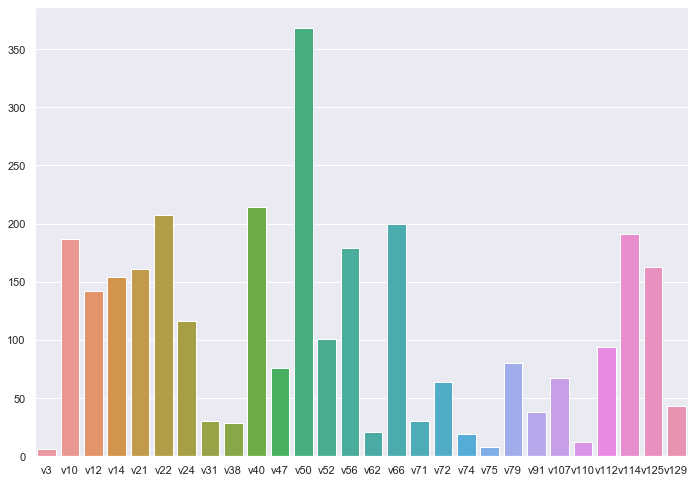

In [73]:
get_score(data1)

In [74]:
def get_score_xgb(data1):
    data = data1.copy()
    preprocess_data(data)
    x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis = 1),data['target'], random_state = 42, test_size = 0.3 )

    model = XGBClassifier()
    model.fit(x_train, y_train)
    result= model.predict_proba(x_test)
    print(log_loss(y_test, result))
    print(sns.barplot( data.columns[1:], model.feature_importances_))

0.473211000784834
AxesSubplot(0.125,0.125;0.775x0.755)


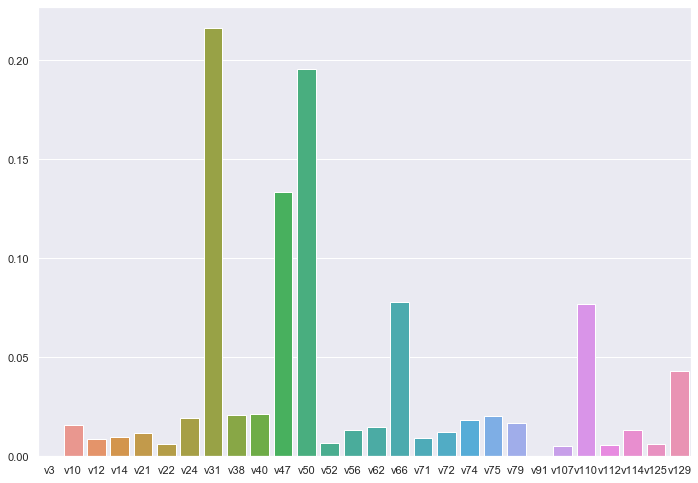

In [75]:
get_score_xgb(data1)

In [76]:
from sklearn.ensemble import RandomForestClassifier
def get_score_forest(data1):
    data = data1.copy()
    preprocess_data(data)
    x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis = 1),data['target'], random_state = 42, test_size = 0.3 )

    model = LGBMClassifier()
    model.fit(x_train, y_train)
    result= model.predict_proba(x_test)
    print(log_loss(y_test, result))
    print(sns.barplot( data.columns[1:], model.feature_importances_))

0.4675414692710243
AxesSubplot(0.125,0.125;0.775x0.755)


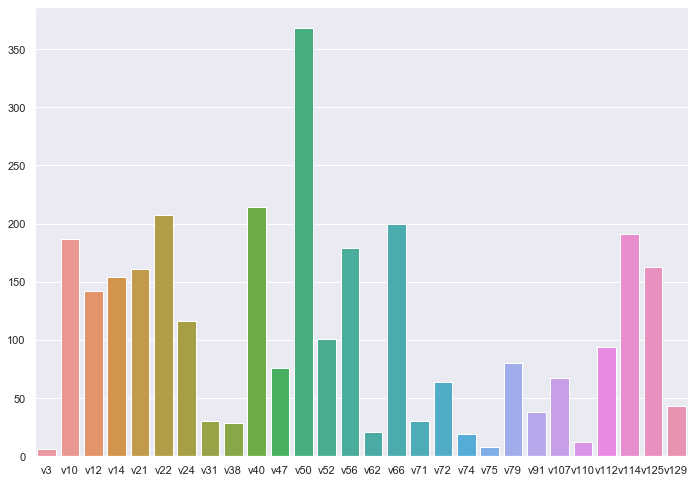

In [77]:
get_score_forest(data1)

In [78]:
from sklearn.model_selection import GridSearchCV

In [81]:
def get_score_lgbm_grid_search(data1):
    data = data1.copy()
    preprocess_data(data)
    x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis = 1),data['target'], random_state = 42, test_size = 0.3 )

    params = {
    'n_estimators':[1000],
    'max_depth':[8,13,17,20],
    'min_child_weight':[1,1.2,1.5],
    'learning_rate':[0.1],
    }
    model = GridSearchCV(estimator = LGBMClassifier(),    
    param_grid = params,
    scoring = 'neg_log_loss',
    cv = 5,
    n_jobs = 7)
    model.fit(x_train, y_train)
    
    result= model.predict_proba(x_test)
    print(log_loss(y_test, result))
    return model

In [82]:
model_lgbm = get_score_lgbm_grid_search(data1)

0.47319831978294885


In [83]:
model_lgbm.best_params_

{'learning_rate': 0.1,
 'max_depth': 17,
 'min_child_weight': 1.2,
 'n_estimators': 1000}

TUNING LIGHTGBM

In [98]:
def get_score_lgbm_grid_search_2(data1):
    data = data1.copy()
    preprocess_data(data)
    x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis = 1),data['target'], random_state = 42, test_size = 0.3 )

    params = {
    'n_estimators':[100,500,1000,1500],
    'max_depth':[17],
    'min_child_weight':[1.2],
    'learning_rate':[0.1],
    }
    model = GridSearchCV(estimator = LGBMClassifier(),    
    param_grid = params,
    scoring = 'neg_log_loss',
    cv = 5,
    n_jobs = 7)
    model.fit(x_train, y_train)
    
    result= model.predict_proba(x_test)
    print(log_loss(y_test, result))
    return model

In [99]:
model_lgbm = get_score_lgbm_grid_search_2(data1)

0.4677722906624327


In [100]:
model_lgbm.best_params_

{'learning_rate': 0.1,
 'max_depth': 17,
 'min_child_weight': 1.2,
 'n_estimators': 100}

In [101]:
def get_score_lgbm_grid_search_3(data1):
    data = data1.copy()
    preprocess_data(data)
    x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis = 1),data['target'], random_state = 42, test_size = 0.3 )

    params = {
    'n_estimators':[20,50,70,90],
    'max_depth':[17],
    'min_child_weight':[1.2],
    'learning_rate':[0.1],
    }
    model = GridSearchCV(estimator = LGBMClassifier(),    
    param_grid = params,
    scoring = 'neg_log_loss',
    cv = 5,
    n_jobs = 7)
    model.fit(x_train, y_train)
    
    result= model.predict_proba(x_test)
    print(log_loss(y_test, result))
    return model

In [102]:
model_lgbm = get_score_lgbm_grid_search_3(data1)

0.46785727736658783


In [103]:
model_lgbm.best_params_

{'learning_rate': 0.1,
 'max_depth': 17,
 'min_child_weight': 1.2,
 'n_estimators': 90}

In [107]:
from mlxtend.classifier import StackingCVClassifier

In [108]:
model = StackingCVClassifier(classifiers=(LGBMClassifier(),RandomForestClassifier()),
                            meta_classifier=XGBClassifier(), cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,n_jobs = 16,
                            random_state=42)

In [109]:
model.fit(x_train, y_train)

StackingCVClassifier(classifiers=(LGBMClassifier(boosting_type='gbdt',
                                                 class_weight=None,
                                                 colsample_bytree=1.0,
                                                 importance_type='split',
                                                 learning_rate=0.1,
                                                 max_depth=-1,
                                                 min_child_samples=20,
                                                 min_child_weight=0.001,
                                                 min_split_gain=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 num_leaves=31, objective=None,
                                                 random_state=None,
                                                 reg_alpha=0.0, reg_lambda=0.0,
                                                 silent=True, subs

In [111]:
result= model.predict_proba(x_test)
print(log_loss(y_test, result))

0.47155175206919747


In [115]:
from sklearn.model_selection import cross_val_score

In [119]:
cross_val_score(model, data.drop('target',axis = 1), data['target'], cv = 5, n_jobs = -1, scoring = 'neg_log_loss')

array([-0.47310802, -0.47462702, -0.47262046, -0.47463618, -0.4713808 ])

In [120]:
cross_val_score(model_lgbm, data.drop('target',axis = 1), data['target'], cv = 5, n_jobs = -1, scoring = 'neg_log_loss')

array([-0.46875326, -0.46862201, -0.46750017, -0.46990191, -0.46662827])

In [134]:
def get_submission(data1, model):
    data = data1.copy()
    test = pd.read_csv('test.csv')
    preprocess_data(test)
    preprocess_data(data)

    model.fit(data.drop('target',axis = 1), data['target'])
    result= pd.DataFrame(model.predict_proba(test.set_index('ID')),columns=["1", "PredictedProb"])
#     print(result)
    result_df = pd.concat([test.reset_index()['ID'] , result.drop('1', axis = 1)], axis = 1)
    pd.DataFrame(result_df).set_index('ID').to_csv('go.csv')

In [135]:
get_submission(data1, model_lgbm)

In [12]:
from xgboost import XGBClassifier

In [13]:
model = XGBClassifier()
model.fit(data.drop('target',axis = 1), data['target'])